In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.integrate import solve_ivp

In [2]:
def approxLinear(X, Y):
  '''
  Calculating an approximation for the linear map for Y = AX

  Params:
  -------
  X : data matrix consisting of the regression data
  Y : labels of the data points in X

  Returns:
  --------
  A : an approximation for the linear regression map
  '''
  return np.linalg.lstsq(X, Y, rcond=None)[0].T

In [3]:
def loadVecData(file_x0, file_x1):
  '''
  Loading the data of the two files given in this task.

  Params:
  -------
  file_x0 : name of the file with the data for the starting points
  file_x1 : name of the file with the data for the points after a certain time

  Returns:
  --------
  x0_data, x1_data: tuple with the two data sets loaded as numpy arrays
  '''
  
  x0 = open(f'{file_x0}.txt', 'r')
  x1 = open(f'{file_x1}.txt', 'r')

  x0_data = np.loadtxt(x0)
  x1_data = np.loadtxt(x1)

  x0.close()
  x1.close()
  return x0_data, x1_data

In [4]:
def generateVector(x0, x1, timestep):
  '''
  Using the finite-differences formula to calculate the vectors

  Params:
  -------
  x0 : data set with the inital points
  x1 : data set with the points after some time
  timestep: time between the two data sets

  Returns:
  --------
  vec: vector as an approximation in which direction each point moves
  '''
  
  return (x1 - x0) / timestep 

In [5]:
def mse(real_data, predicted_data):
  '''
  Calculating the MSE-error between the real and the approximated data

  Params:
  -------
  real_data : the real data that is to be approximated
  predicted_data : approximated data that is considered close to the real

  Returns:
  --------
  mse : MSE-error with euclidian norm used as baseline
  '''
  
  return np.linalg.norm(real_data - predicted_data) ** 2 / len(real_data)

###Loading Data
---

In [6]:
'''loading the data'''
x0, x1 = loadVecData('linear_vectorfield_data_x0', 'linear_vectorfield_data_x1')

Text(0.5, 1.0, 'Data set')

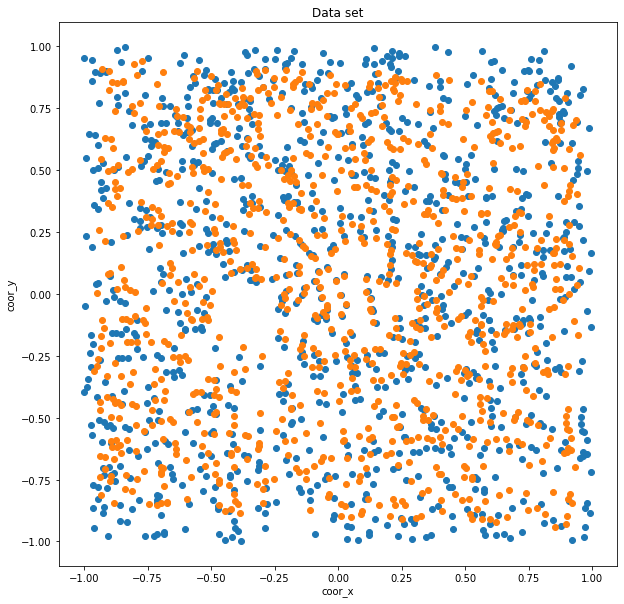

In [7]:
'''plotting the original data and have a look at the possible flow'''
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.scatter(x0[:, 0], x0[:, 1])
ax.scatter(x1[:, 0], x1[:, 1])
ax.set_xlabel('coor_x')
ax.set_ylabel('coor_y')
ax.set_title(f'Data set')  

###Part 1 & Part 2
---

In [8]:
def getTrajectoryEnd(x, t_end):
  '''
  Calculating the approximation up until some time point

  Params:
  -------
  x : the starting points that are feed into the initial value problem solver
  t_end : the time when to stop the calculation

  Returns:
  --------
  trajectory : the location of the inital values after the approximation finished 
  '''
  
  t_0 = 0
  t=np.linspace(t_0, t_end, int(t_end/step) + 1)

  trajectory = None
  for points in x:
    new_point = solve_ivp(vectorfield, t_span=(t.min(), t.max()), y0=points, t_eval=[t_end]).y
    new_point = new_point.reshape(-1, 2)
    if trajectory is None:
      trajectory = np.array(new_point)
    else:
      trajectory = np.vstack([trajectory, new_point])

  return trajectory

In [9]:
def getMSEerror():
  '''
  Calculating the MSE error for the approximation in this task

  Params:
  -------
  Returns:
  --------
  '''
  
  approx_data = getTrajectoryEnd(x0, 1)
  return mse(x1, approx_data)

In [10]:
step = 0.1 # setting the time step 
vec = generateVector(x0, x1, step) # calculating the finite-difference vectors

func = approxLinear(x0, vec) # approximate the linear map

def vectorfield(t, X):
  '''
  Defining the vector field that was approximated based on the given step and func
  
  Params:
  -------
  t : time that is considered in the ivp solver
  X : data point for which the next destination is calculated

  Returns:
  --------
  the flow in each component separately to use in the ivp solver
  '''
  
  X1, X2 = X
  return [(X1 * func.T[:, 0][0] + X2 * func.T[:, 0][1]) * step, 
          (X1 * func.T[:, 1][0] + X2 * func.T[:, 1][1]) * step]

print(f'Generated approximation error: {getMSEerror()}')

Generated approximation error: 9.957557151178488e-06


In [11]:
def plotEnding(X, t_end):
  '''
  Plotting the approximation up to some certain time against the data points
  after one time step in a 2D plot

  Params:
  -------
  X : data set with inital points to start from and the data after one time step
  t_end : the time when to stop the calculation
  
  Returns:
  --------
  '''
  
  t_0 = 0
  t=np.linspace(t_0, t_end, int(t_end/step) + 1)

  fig = plt.figure(figsize=(10, 10))
  ax=fig.add_subplot()

  trajectory = getTrajectoryEnd(X[0], t_end)

  ax.scatter(trajectory[:, 0], trajectory[:, 1])
  ax.scatter(X[1][:, 0], X[1][:, 1])

  ax.set_xlabel('coor_x')
  ax.set_ylabel('coor_y')
  ax.set_title(f'At time {t_end}')  

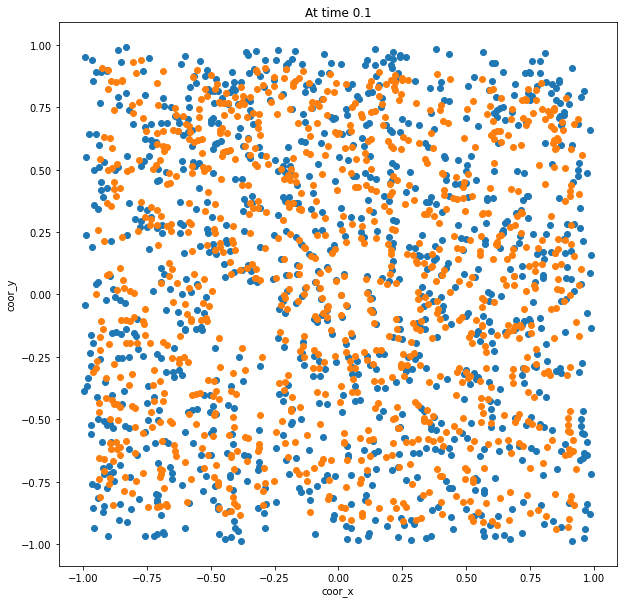

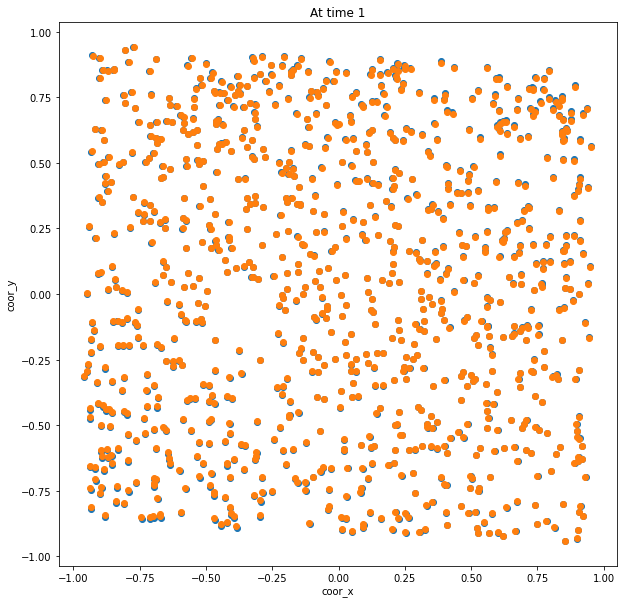

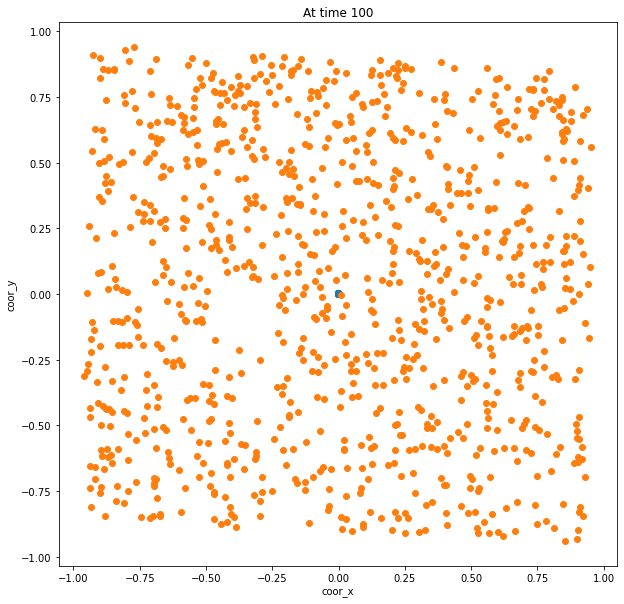

In [12]:
plotEnding((x0, x1), 0.1)
plotEnding((x0, x1), 1)
plotEnding((x0, x1), 100)

###Part 3
---

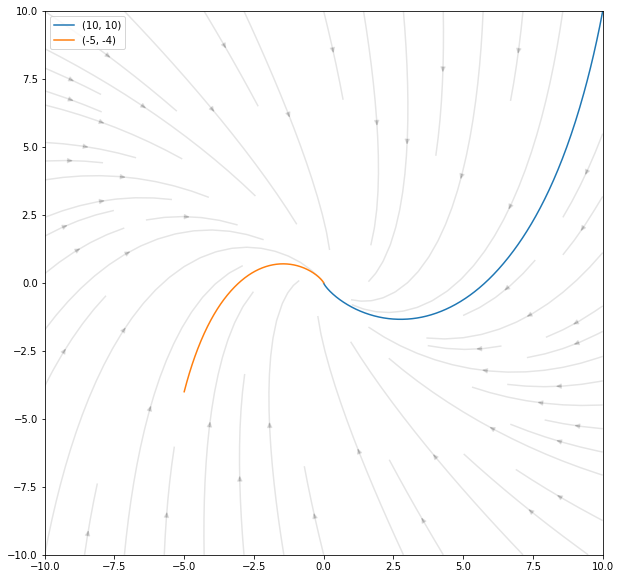

In [13]:
'''plotting the phase diagram of the approximated vectorfield'''

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

w = 10
X2, X1 = np.mgrid[-w:w:100j, -w:w:100j]
U, V = vectorfield(0, (X1, X2))
ax.streamplot(X1, X2, U, V, density=[0.5, 1], color = (0,0,0,.1))


'''
additionally plotting two trajectories of starting points that
flow inside the vectorfield for a certain amount of time
'''
t_0, t_end = 0, 100
t=np.linspace(t_0, t_end, int(t_end/step) + 1)


start_points = [(10, 10), (-5, -4)]
for point in start_points:
  trajectory = solve_ivp(vectorfield, t_span=(t.min(), t.max()), y0=point, t_eval=t)
  ax.plot(trajectory.y[0], trajectory.y[1])
ax.legend(start_points)